In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.rcParams['font.family'] = 'AppleGothic'

## 0. 데이터호출

In [2]:
# 블록별 성별연령대별 카드소비패턴
Gender_Age = pd.read_csv('./Data/블록별 성별연령대별 카드소비패턴.csv', encoding = 'utf-8') 
# 집계구별 일별소비지역별 카드소비패
YMD_Reg = pd.read_csv('./Data/집계구별 일별소비지역별 카드소비패턴.csv', encoding = 'utf-8')
# 집계구별 일별시간대별 카드소비패턴 
Time_Reg = pd.read_csv('./Data/집계구별 일별시간대별 카드소비패턴.csv', encoding = 'utf-8') 
# 카드소비 업종코드
Code = pd.read_csv('./Data/카드소비 업종코드.csv', encoding='cp949')

In [3]:
Gender_Age.head()

,고객주소블록코드(BLOCK_CD),기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR)
0,153611,201901,SS064,M,50대,5,1058400
1,14239,201901,SS090,F,50대,5,2822400
2,225872,201901,SS069,M,30대,60,1948141
3,158041,201901,SS041,M,60대,5,146160
4,360829,201901,SS066,M,50대,45,2787886


In [4]:
YMD_Reg.head()

,가맹점주소광역시도(SIDO),가맹점주소시군구(SGG),업종대분류(UPJONG_CLASS1),기준일자(YMD),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,서울,서초구,의료,20190107,1112073020006,114912,15
1,경기,안양시,요식유흥,20190122,1120056010010,117936,15
2,서울,서대문구,의료,20190117,1113071020102,326743,35
3,서울,마포구,유통,20190102,1108071040110,33768,5
4,서울,강남구,유통,20190108,1118057010001,63000,15


In [5]:
Time_Reg.head()

,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,의료,20190128,2,1111073010102,22680,10
1,전자상거래,20190105,6,1119055010001,356832,10
2,유통,20190101,3,1117055021106,1121350,30
3,주유,20190101,5,1110061010006,126292,5
4,유통,20190117,6,1123065020004,376236,35


In [6]:
Code.head()

,업종코드(UPJONG_CD),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3)
0,ss001,요식/유흥,한식,한식
1,ss002,요식/유흥,일식/중식/양식,일식
2,ss003,요식/유흥,일식/중식/양식,양식
3,ss004,요식/유흥,일식/중식/양식,중식
4,ss005,요식/유흥,제과/커피/패스트푸드,제과점


In [7]:
Time_Reg.info()
''' 타입변환
기준일자(YMD)             12000 non-null  int64
시간대구간(TIME)           12000 non-null  int64
고객주소집계구별(TOT_REG_CD)  12000 non-null  int64
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   업종대분류(UPJONG_CLASS1)  12000 non-null  object
 1   기준일자(YMD)             12000 non-null  int64 
 2   시간대구간(TIME)           12000 non-null  int64 
 3   고객주소집계구별(TOT_REG_CD)  12000 non-null  int64 
 4   카드이용금액계(AMT_CORR)     12000 non-null  int64 
 5   카드이용건수계(USECT_CORR)   12000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 562.6+ KB


' 타입변환\n기준일자(YMD)             12000 non-null  int64\n시간대구간(TIME)           12000 non-null  int64\n고객주소집계구별(TOT_REG_CD)  12000 non-null  int64\n'

## 1. 데이터 정제
#### 각 데이터 타입 확인 및 데이터에 맞는 타입변환 시행

In [8]:
Time_Reg = Time_Reg.astype({'고객주소집계구별(TOT_REG_CD)':'object'})
Time_Reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   업종대분류(UPJONG_CLASS1)  12000 non-null  object
 1   기준일자(YMD)             12000 non-null  int64 
 2   시간대구간(TIME)           12000 non-null  int64 
 3   고객주소집계구별(TOT_REG_CD)  12000 non-null  object
 4   카드이용금액계(AMT_CORR)     12000 non-null  int64 
 5   카드이용건수계(USECT_CORR)   12000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 562.6+ KB


In [9]:
Time_Reg['기준일자(YMD)'] = pd.to_datetime(Time_Reg['기준일자(YMD)'], format = '%Y%m%d')
Time_Reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   업종대분류(UPJONG_CLASS1)  12000 non-null  object        
 1   기준일자(YMD)             12000 non-null  datetime64[ns]
 2   시간대구간(TIME)           12000 non-null  int64         
 3   고객주소집계구별(TOT_REG_CD)  12000 non-null  object        
 4   카드이용금액계(AMT_CORR)     12000 non-null  int64         
 5   카드이용건수계(USECT_CORR)   12000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 562.6+ KB


In [10]:
Time_Reg.head()

,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,의료,2019-01-28,2,1111073010102,22680,10
1,전자상거래,2019-01-05,6,1119055010001,356832,10
2,유통,2019-01-01,3,1117055021106,1121350,30
3,주유,2019-01-01,5,1110061010006,126292,5
4,유통,2019-01-17,6,1123065020004,376236,35


In [11]:
Time_Reg.describe()

,시간대구간(TIME),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
count,12000.000000,1.200000e+04,12000.000000
mean,3.711583,5.451063e+05,17.587750
std,1.502472,1.541955e+06,23.231741
min,1.000000,5.000000e+00,5.000000
25%,3.000000,7.233800e+04,5.000000
50%,4.000000,2.070755e+05,10.000000
75%,5.000000,5.376212e+05,20.000000
max,6.000000,5.698038e+07,659.000000


In [12]:
# 데이터 분석에 사용되지 않는 column 제거
Gender_Age.drop(['고객주소블록코드(BLOCK_CD)'], axis = 1, inplace = True)
YMD_Reg.drop(['고객주소집계구별(TOT_REG_CD)'], axis = 1, inplace = True)
Time_Reg.drop('고객주소집계구별(TOT_REG_CD)', axis = 1, inplace = True)

### 결측치 처리

In [13]:
YMD_Reg

,가맹점주소광역시도(SIDO),가맹점주소시군구(SGG),업종대분류(UPJONG_CLASS1),기준일자(YMD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,서울,서초구,의료,20190107,114912,15
1,경기,안양시,요식유흥,20190122,117936,15
2,서울,서대문구,의료,20190117,326743,35
3,서울,마포구,유통,20190102,33768,5
4,서울,강남구,유통,20190108,63000,15
...,...,...,...,...,...,...
11995,서울,마포구,전자상거래,20201227,272874,10
11996,서울,송파구,전자상거래,20201222,331690,10
11997,경기,성남시,유통,20201219,11242,5
11998,서울,동대문구,주유,20201215,206132,5


In [14]:
YMD_Reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   가맹점주소광역시도(SIDO)       12000 non-null  object
 1   가맹점주소시군구(SGG)         10911 non-null  object
 2   업종대분류(UPJONG_CLASS1)  12000 non-null  object
 3   기준일자(YMD)             12000 non-null  int64 
 4   카드이용금액계(AMT_CORR)     12000 non-null  int64 
 5   카드이용건수계(USECT_CORR)   12000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 562.6+ KB


In [15]:
# 하나라도 결측값이 포함된 행 전체 출력
YMD_Reg[YMD_Reg.isnull().any(axis = 1)].head()

,가맹점주소광역시도(SIDO),가맹점주소시군구(SGG),업종대분류(UPJONG_CLASS1),기준일자(YMD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
14,대전,NaN,여행교통,20190125,49392,10
33,울산,NaN,요식유흥,20190106,148831,5
52,경남,NaN,음식료품,20190124,105840,5
80,경북,NaN,요식유흥,20190122,60480,5
94,충북,NaN,유통,20190131,26460,5


In [16]:
# 결측치 제거
data3_adj = YMD_Reg.dropna(how='any', inplace = False)
data3_adj

,가맹점주소광역시도(SIDO),가맹점주소시군구(SGG),업종대분류(UPJONG_CLASS1),기준일자(YMD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,서울,서초구,의료,20190107,114912,15
1,경기,안양시,요식유흥,20190122,117936,15
2,서울,서대문구,의료,20190117,326743,35
3,서울,마포구,유통,20190102,33768,5
4,서울,강남구,유통,20190108,63000,15
...,...,...,...,...,...,...
11995,서울,마포구,전자상거래,20201227,272874,10
11996,서울,송파구,전자상거래,20201222,331690,10
11997,경기,성남시,유통,20201219,11242,5
11998,서울,동대문구,주유,20201215,206132,5


### 이상치 처리

범주형 데이터의 이상치 처리

In [17]:
Gender_Age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   기준년월(YM)             12000 non-null  int64 
 1   서울시민업종코드(UPJONG_CD)  12000 non-null  object
 2   성별(GENDER)           12000 non-null  object
 3   연령대별(AGE)            12000 non-null  object
 4   카드이용건수계(USECT_CORR)  12000 non-null  int64 
 5   카드이용금액계(AMT_CORR)    12000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 562.6+ KB


In [18]:
Gender_Age['성별(GENDER)'].unique()

array(['M', 'F'], dtype=object)

In [19]:
Gender_Age['연령대별(AGE)'].unique()

array(['50대', '30대', '60대', '40대', '70대이상', '20대', '10대'], dtype=object)

In [20]:
Gender_Age['서울시민업종코드(UPJONG_CD)'].unique()

array(['SS064', 'SS090', 'SS069', 'SS041', 'SS066', 'SS007', 'SS055',
       'SS034', 'SS040', 'SS021', 'SS006', 'SS013', 'SS012', 'SS049',
       'SS092', 'SS019', 'SS001', 'SS057', 'SS048', 'SS003', 'SS020',
       'SS058', 'SS032', 'SS070', 'SS015', 'SS002', 'SS068', 'SS008',
       'SS036', 'SS060', 'SS028', 'SS030', 'SS056', 'SS044', 'SS042',
       'SS038', 'SS053', 'SS004', 'SS047', 'SS043', 'SS022', 'SS018',
       'SS063', 'SS005', 'SS017', 'SS046', 'SS016', 'SS031', 'SS009',
       'SS033', 'SS065', 'SS014', 'SS023', 'SS039', 'SS062', 'SS010',
       'SS082', 'SS024', 'SS054', 'SS029', 'SS091', 'SS059', 'SS081',
       'SS027', 'SS045', 'SS067', 'SS035', 'SS052', 'SS083', 'SS061',
       'SS011', 'SS037', 'SS050', 'SS093'], dtype=object)

수치형 데이터의 이상치 처리

그래프로 이상치 확인

In [21]:
Gender_Age.describe()[['카드이용건수계(USECT_CORR)','카드이용금액계(AMT_CORR)']]

,카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR)
count,12000.000000,1.200000e+04
mean,31.154750,9.494519e+05
std,74.377063,2.698311e+06
min,5.000000,5.000000e+00
25%,5.000000,8.977200e+04
50%,10.000000,2.721700e+05
75%,26.000000,8.349150e+05
max,3570.000000,1.160429e+08


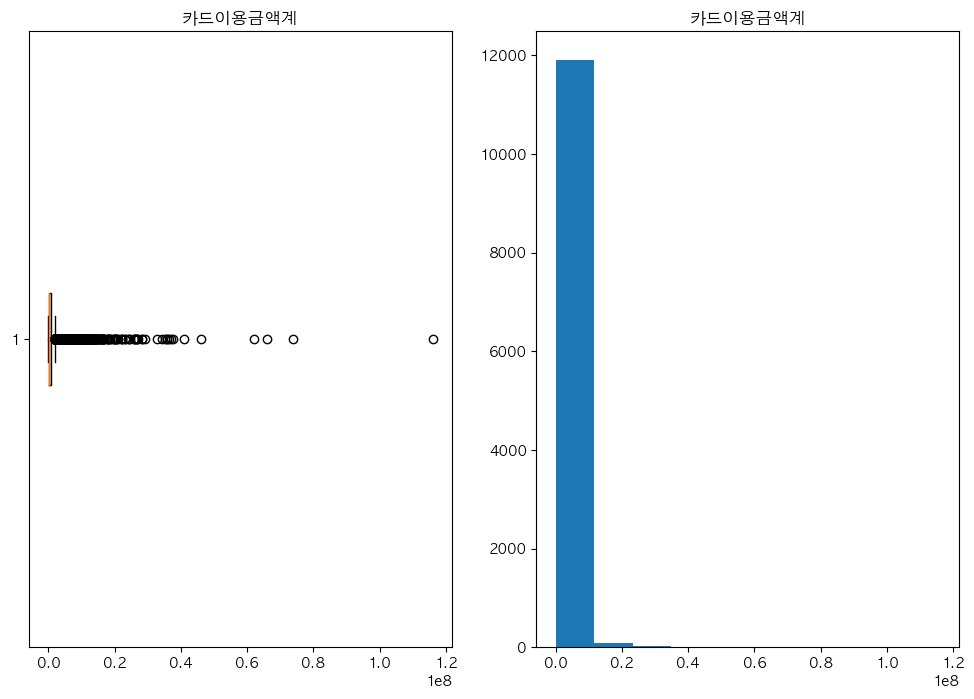

In [22]:
plt.figure(figsize = (12, 8))

plt.subplot(121)
plt.boxplot(Gender_Age['카드이용금액계(AMT_CORR)'], vert = False)
plt.title('카드이용금액계')
plt.subplot(122)
plt.hist(Gender_Age['카드이용금액계(AMT_CORR)'])
plt.title('카드이용금액계')
plt.show()

In [23]:
# 최대값을 가진 행 전체 확인
Gender_Age[Gender_Age['카드이용금액계(AMT_CORR)'] == np.max(Gender_Age['카드이용금액계(AMT_CORR)'])]

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR)
10531,202010,SS069,M,40대,199,116042949


In [24]:
# 최대값을 가진 행 제거
Gender_Age.drop(Gender_Age[Gender_Age.loc[:,'카드이용금액계(AMT_CORR)'] == np.max(Gender_Age.loc[:,'카드이용금액계(AMT_CORR)'])].index, axis = 0, inplace = True)

In [25]:
# 최대값을 가진 행 전체 확인
Gender_Age[Gender_Age['카드이용금액계(AMT_CORR)'] == np.max(Gender_Age['카드이용금액계(AMT_CORR)'])]

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR)
605,201902,SS068,F,30대,885,73911429


In [26]:
print(Gender_Age.nlargest(2, '카드이용금액계(AMT_CORR)')['카드이용금액계(AMT_CORR)'])

605     73911429
3603    66054546
Name: 카드이용금액계(AMT_CORR), dtype: int64


In [27]:
# 2번째로 큰 값으로 대체하기

# 2번째 큰 값 계산
Second_large = Gender_Age.nlargest(2, '카드이용금액계(AMT_CORR)')['카드이용금액계(AMT_CORR)'].values[1]

# 최대값을 2번째 큰 값으로 교체
Gender_Age.loc[Gender_Age[Gender_Age.iloc[:,5] == np.max(Gender_Age.iloc[:,5])].index,'카드이용금액계(AMT_CORR)'] = Second_large

In [28]:
Second_large

66054546

In [29]:
Gender_Age[Gender_Age['카드이용금액계(AMT_CORR)'] == np.max(Gender_Age['카드이용금액계(AMT_CORR)'])]

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR)
605,201902,SS068,F,30대,885,66054546
3603,201908,SS017,M,40대,10,66054546


사분위수 범위로 이상치 처리

In [30]:
Q1 = Gender_Age['카드이용금액계(AMT_CORR)'].quantile(.25)
Q3 = Gender_Age['카드이용금액계(AMT_CORR)'].quantile(.75)
IQR = Q3 - Q1

Upper_IQR = Q3 + 1.5*IQR
Lower_IQR = Q1 - 1.5*IQR

print("Upper_IQR : ", Upper_IQR, "Lower_IQR : ", Lower_IQR)

Upper_IQR :  1952201.0 Lower_IQR :  -1027703.0


In [31]:
Gender_Age.loc[Gender_Age['카드이용금액계(AMT_CORR)'] >= Upper_IQR]

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR)
1,201901,SS090,F,50대,5,2822400
4,201901,SS066,M,50대,45,2787886
20,201901,SS013,M,60대,333,4822776
22,201901,SS001,F,50대,141,3990672
26,201901,SS049,M,40대,5,6504775
...,...,...,...,...,...,...
11971,202012,SS013,F,20대,143,2086771
11973,202012,SS069,F,40대,51,6766151
11976,202012,SS016,M,20대,603,2961501
11994,202012,SS066,M,40대,87,4282180


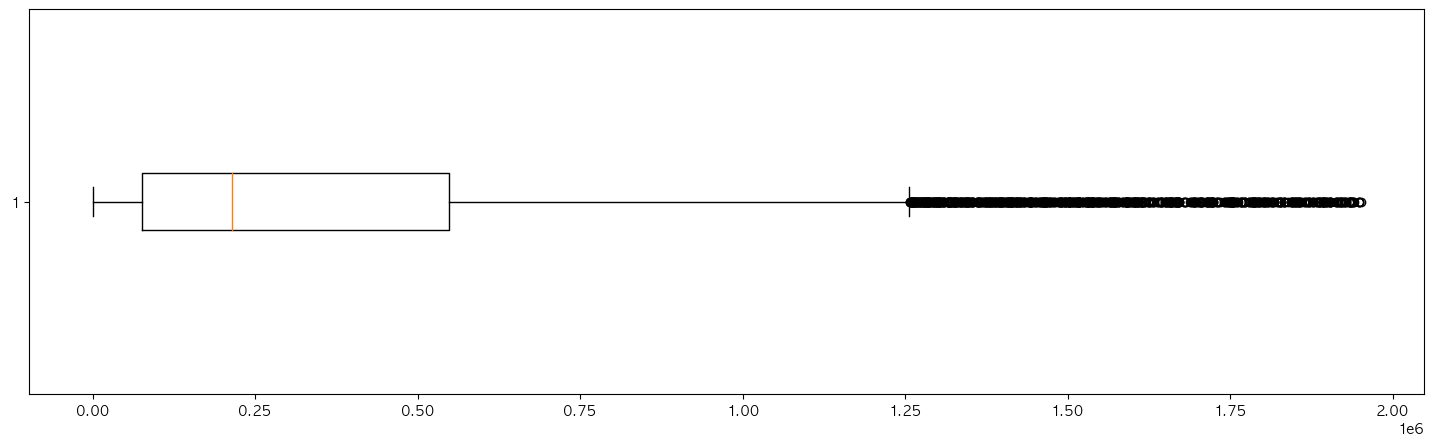

In [32]:
temp = Gender_Age.drop(Gender_Age.loc[Gender_Age['카드이용금액계(AMT_CORR)'] >= Upper_IQR].index, inplace = False)
plt.figure(figsize = (18, 5))
plt.boxplot(temp['카드이용금액계(AMT_CORR)'], vert = False)
plt.show()

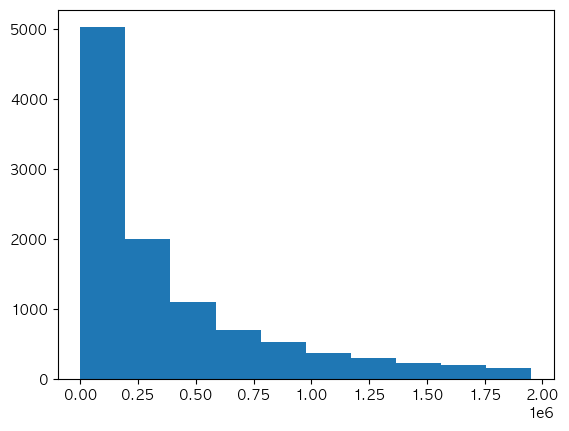

In [33]:
plt.hist(temp['카드이용금액계(AMT_CORR)'])
plt.show()

z-score로 이상치 처리

In [34]:
upper_2sigma = Gender_Age['카드이용금액계(AMT_CORR)'].mean() + 2*Gender_Age['카드이용금액계(AMT_CORR)'].std()

lower_2sigma = Gender_Age['카드이용금액계(AMT_CORR)'].mean() - 2*Gender_Age['카드이용금액계(AMT_CORR)'].std()

print('upper_2sigma : ', upper_2sigma, 'lower_2sigma : ', lower_2sigma)
Gender_Age.loc[Gender_Age['카드이용금액계(AMT_CORR)'] >= upper_2sigma]

upper_2sigma :  5873538.418657171 lower_2sigma :  -3995128.138967197


,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR)
26,201901,SS049,M,40대,5,6504775
91,201901,SS063,F,40대,5,61921440
120,201901,SS001,M,40대,136,5958288
147,201901,SS057,F,30대,10,10080000
158,201901,SS017,F,60대,202,15262133
...,...,...,...,...,...,...
11896,202012,SS049,F,30대,20,11846477
11907,202012,SS049,F,70대이상,5,7181492
11914,202012,SS069,M,40대,327,35664463
11927,202012,SS068,F,30대,169,6264799


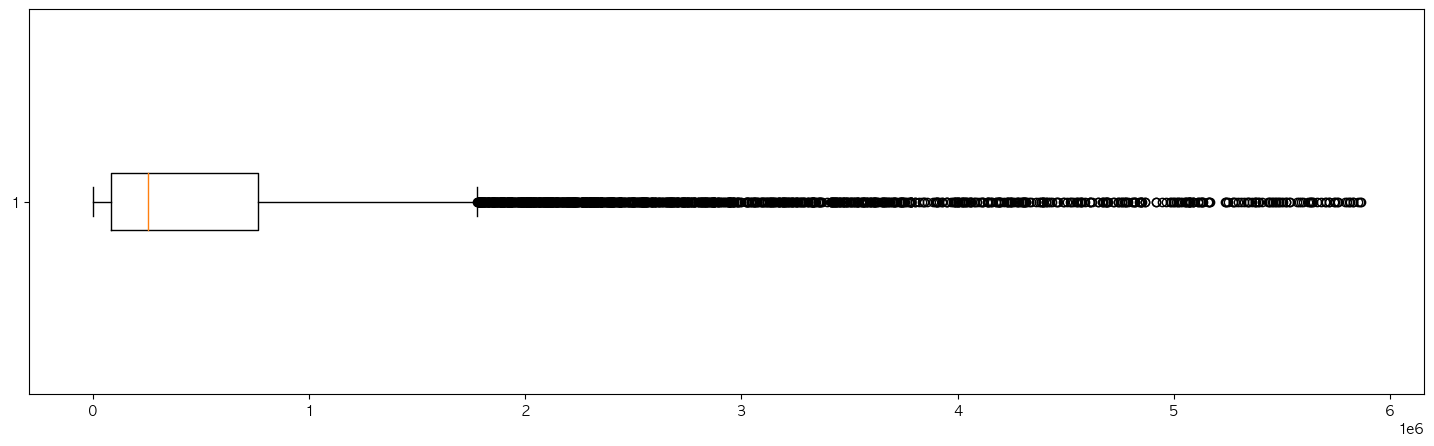

In [35]:
temp2 = Gender_Age.drop(Gender_Age.loc[Gender_Age['카드이용금액계(AMT_CORR)'] >= upper_2sigma].index, inplace = False)
plt.figure(figsize=(18, 5))
plt.boxplot(temp2['카드이용금액계(AMT_CORR)'], vert = False)
plt.show()

### 파생변수 생성

In [36]:
Gender_Age['temp_date'] = pd.to_datetime(Gender_Age['기준년월(YM)'],format = "%Y%m")
Gender_Age['기준년도(Y)'] = Gender_Age['temp_date'].dt.year
Gender_Age['기준월(M)'] = Gender_Age['temp_date'].dt.month
Gender_Age.drop(['temp_date'], axis = 1, inplace = True)
Gender_Age

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도(Y),기준월(M)
0,201901,SS064,M,50대,5,1058400,2019,1
1,201901,SS090,F,50대,5,2822400,2019,1
2,201901,SS069,M,30대,60,1948141,2019,1
3,201901,SS041,M,60대,5,146160,2019,1
4,201901,SS066,M,50대,45,2787886,2019,1
...,...,...,...,...,...,...,...,...
11995,202012,SS008,M,60대,5,122640,2020,12
11996,202012,SS066,M,40대,56,3093436,2020,12
11997,202012,SS018,M,50대,5,167608,2020,12
11998,202012,SS066,F,30대,26,1328600,2020,12


In [37]:
Gender_Age['건당카드평균이용금액(MEAN_CORR)'] = round(Gender_Age['카드이용금액계(AMT_CORR)'] / Gender_Age['카드이용건수계(USECT_CORR)'], 2)

In [38]:
Gender_Age

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도(Y),기준월(M),건당카드평균이용금액(MEAN_CORR)
0,201901,SS064,M,50대,5,1058400,2019,1,211680.00
1,201901,SS090,F,50대,5,2822400,2019,1,564480.00
2,201901,SS069,M,30대,60,1948141,2019,1,32469.02
3,201901,SS041,M,60대,5,146160,2019,1,29232.00
4,201901,SS066,M,50대,45,2787886,2019,1,61953.02
...,...,...,...,...,...,...,...,...,...
11995,202012,SS008,M,60대,5,122640,2020,12,24528.00
11996,202012,SS066,M,40대,56,3093436,2020,12,55239.93
11997,202012,SS018,M,50대,5,167608,2020,12,33521.60
11998,202012,SS066,F,30대,26,1328600,2020,12,51100.00


In [39]:
Code.head()

,업종코드(UPJONG_CD),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3)
0,ss001,요식/유흥,한식,한식
1,ss002,요식/유흥,일식/중식/양식,일식
2,ss003,요식/유흥,일식/중식/양식,양식
3,ss004,요식/유흥,일식/중식/양식,중식
4,ss005,요식/유흥,제과/커피/패스트푸드,제과점


In [40]:
Code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   업종코드(UPJONG_CD)  75 non-null     object
 1   대분류(CLASS1)      75 non-null     object
 2   중분류(CLASS2)      75 non-null     object
 3   소분류(CLASS3)      75 non-null     object
dtypes: object(4)
memory usage: 2.5+ KB


In [41]:
Code['업종코드(UPJONG_CD)'] = Code['업종코드(UPJONG_CD)'].str.upper()
Code

,업종코드(UPJONG_CD),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3)
0,SS001,요식/유흥,한식,한식
1,SS002,요식/유흥,일식/중식/양식,일식
2,SS003,요식/유흥,일식/중식/양식,양식
3,SS004,요식/유흥,일식/중식/양식,중식
4,SS005,요식/유흥,제과/커피/패스트푸드,제과점
...,...,...,...,...
70,SS084,스포츠/문화/레저,스포츠/문화/레저,스키
71,SS090,교육/학원,학원,입시보습학원
72,SS091,교육/학원,학원,외국어학원
73,SS092,교육/학원,학원,예체능학원


In [42]:
Gender_Age = Gender_Age.merge(Code, left_on='서울시민업종코드(UPJONG_CD)', right_on='업종코드(UPJONG_CD)', how = 'inner')
Gender_Age.drop('업종코드(UPJONG_CD)',axis = 1, inplace = True)
Gender_Age

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도(Y),기준월(M),건당카드평균이용금액(MEAN_CORR),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3)
0,201901,SS064,M,50대,5,1058400,2019,1,211680.00,자동차,자동차서비스/용품,자동차서비스
1,201901,SS064,F,30대,30,79632,2019,1,2654.40,자동차,자동차서비스/용품,자동차서비스
2,201901,SS064,M,40대,15,2561913,2019,1,170794.20,자동차,자동차서비스/용품,자동차서비스
3,201901,SS064,F,40대,15,54936,2019,1,3662.40,자동차,자동차서비스/용품,자동차서비스
4,201901,SS064,M,40대,10,66528,2019,1,6652.80,자동차,자동차서비스/용품,자동차서비스
...,...,...,...,...,...,...,...,...,...,...,...,...
11994,202010,SS093,M,40대,5,312732,2020,10,62546.40,교육/학원,학원,취미/전문학원
11995,202011,SS093,F,40대,5,459900,2020,11,91980.00,교육/학원,학원,취미/전문학원
11996,202011,SS093,F,30대,5,817600,2020,11,163520.00,교육/학원,학원,취미/전문학원
11997,202011,SS093,M,30대,5,6949600,2020,11,1389920.00,교육/학원,학원,취미/전문학원


In [43]:
Gender_Age['카드소비정도(RATE_CORR)'] = np.where(Gender_Age['카드이용금액계(AMT_CORR)'] >= 1000000, '대', np.where(Gender_Age['카드이용금액계(AMT_CORR)'] >= 200000, '중', '소'))
Gender_Age

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도(Y),기준월(M),건당카드평균이용금액(MEAN_CORR),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3),카드소비정도(RATE_CORR)
0,201901,SS064,M,50대,5,1058400,2019,1,211680.00,자동차,자동차서비스/용품,자동차서비스,대
1,201901,SS064,F,30대,30,79632,2019,1,2654.40,자동차,자동차서비스/용품,자동차서비스,소
2,201901,SS064,M,40대,15,2561913,2019,1,170794.20,자동차,자동차서비스/용품,자동차서비스,대
3,201901,SS064,F,40대,15,54936,2019,1,3662.40,자동차,자동차서비스/용품,자동차서비스,소
4,201901,SS064,M,40대,10,66528,2019,1,6652.80,자동차,자동차서비스/용품,자동차서비스,소
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,202010,SS093,M,40대,5,312732,2020,10,62546.40,교육/학원,학원,취미/전문학원,중
11995,202011,SS093,F,40대,5,459900,2020,11,91980.00,교육/학원,학원,취미/전문학원,중
11996,202011,SS093,F,30대,5,817600,2020,11,163520.00,교육/학원,학원,취미/전문학원,중
11997,202011,SS093,M,30대,5,6949600,2020,11,1389920.00,교육/학원,학원,취미/전문학원,대


현황 분석

## 2. 데이터 시각화

### 2019년도 남성/여성 건당이용금액 비교

In [44]:
gender_age_2019 = Gender_Age[Gender_Age['기준년도(Y)'] == 2019]
gender_age_2019

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도(Y),기준월(M),건당카드평균이용금액(MEAN_CORR),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3),카드소비정도(RATE_CORR)
0,201901,SS064,M,50대,5,1058400,2019,1,211680.0,자동차,자동차서비스/용품,자동차서비스,대
1,201901,SS064,F,30대,30,79632,2019,1,2654.4,자동차,자동차서비스/용품,자동차서비스,소
2,201901,SS064,M,40대,15,2561913,2019,1,170794.2,자동차,자동차서비스/용품,자동차서비스,대
3,201901,SS064,F,40대,15,54936,2019,1,3662.4,자동차,자동차서비스/용품,자동차서비스,소
4,201901,SS064,M,40대,10,66528,2019,1,6652.8,자동차,자동차서비스/용품,자동차서비스,소
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11970,201908,SS050,F,40대,5,2281500,2019,8,456300.0,교육/학원,학원,독서실,대
11971,201910,SS050,F,40대,5,909000,2019,10,181800.0,교육/학원,학원,독서실,중
11972,201911,SS050,M,50대,10,3490560,2019,11,349056.0,교육/학원,학원,독서실,대
11973,201911,SS050,F,50대,5,151500,2019,11,30300.0,교육/학원,학원,독서실,소


In [45]:
pd.crosstab(gender_age_2019['연령대별(AGE)'], gender_age_2019['서울시민업종코드(UPJONG_CD)'])

서울시민업종코드(UPJONG_CD),SS001,SS002,SS003,SS004,SS005,SS006,SS007,SS008,SS009,SS010,...,SS067,SS068,SS069,SS070,SS081,SS082,SS083,SS090,SS091,SS092
연령대별(AGE),,,,,,,,,,,,,,,,,,,,,
10대,12,8,6,1,4,7,8,15,4,0,...,0,4,9,0,0,0,0,0,0,0
20대,43,26,33,24,44,40,28,50,13,3,...,5,41,43,0,0,5,0,0,0,1
30대,44,21,42,35,43,41,45,49,14,3,...,2,51,61,0,0,2,2,0,2,4
40대,59,19,17,32,28,31,32,57,2,2,...,6,42,39,10,4,9,6,5,4,3
50대,53,19,11,28,43,26,27,42,5,3,...,7,19,17,14,0,8,8,6,0,1
60대,29,6,3,9,15,11,7,28,2,2,...,7,14,11,6,0,3,2,1,0,0
70대이상,23,4,2,3,6,2,3,11,0,0,...,3,3,4,2,1,1,2,0,0,0


In [46]:
gender_age_2019.groupby('성별(GENDER)').mean()

/var/folders/z_/klqlrq151nv7wlzdmp2krt8h0000gn/T/ipykernel_20072/1198490813.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_age_2019.groupby('성별(GENDER)').mean()


,기준년월(YM),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도(Y),기준월(M),건당카드평균이용금액(MEAN_CORR)
성별(GENDER),,,,,,
F,201906.426614,28.852903,931110.628506,2019.0,6.426614,52294.568069
M,201906.576687,34.576346,907290.637355,2019.0,6.576687,47863.653671


In [47]:
# 성별별 카드이용금액 비교 - 막대그래프 활용
gender_2019_amt = gender_age_2019.groupby('성별(GENDER)').mean()['카드이용금액계(AMT_CORR)']/1000
gender_2019_amt = pd.DataFrame(gender_2019_amt).reset_index()
gender_2019_amt


/var/folders/z_/klqlrq151nv7wlzdmp2krt8h0000gn/T/ipykernel_20072/1485027115.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_2019_amt = gender_age_2019.groupby('성별(GENDER)').mean()['카드이용금액계(AMT_CORR)']/1000


,성별(GENDER),카드이용금액계(AMT_CORR)
0,F,931.110629
1,M,907.290637


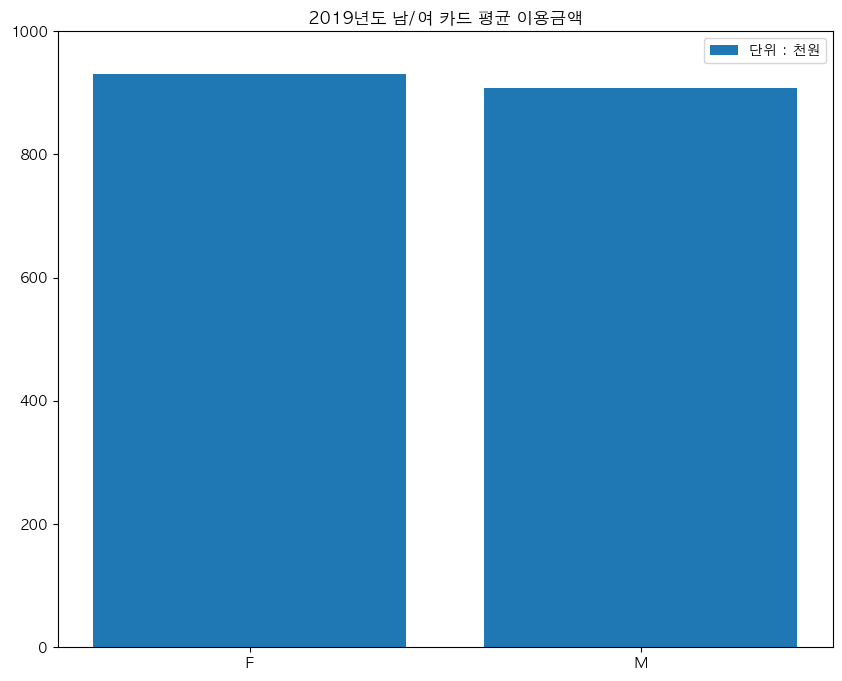

In [48]:
plt.figure(figsize = (10, 8))
plt.bar(gender_2019_amt['성별(GENDER)'], gender_2019_amt['카드이용금액계(AMT_CORR)'], label = '단위 : 천원')
plt.ylim([0, 1000])
plt.title('2019년도 남/여 카드 평균 이용금액')
plt.legend()
plt.show()

### 2019년도 연령대별 평균 이용금액 비교

In [49]:
age_2019_amt = pd.DataFrame(gender_age_2019.groupby('연령대별(AGE)').mean()['카드이용금액계(AMT_CORR)']/1000).reset_index()
age_2019_amt

/var/folders/z_/klqlrq151nv7wlzdmp2krt8h0000gn/T/ipykernel_20072/1052535995.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_2019_amt = pd.DataFrame(gender_age_2019.groupby('연령대별(AGE)').mean()['카드이용금액계(AMT_CORR)']/1000).reset_index()


,연령대별(AGE),카드이용금액계(AMT_CORR)
0,10대,189.158803
1,20대,662.010753
2,30대,998.359478
3,40대,1256.740545
4,50대,1004.357025
5,60대,784.614718
6,70대이상,582.356157


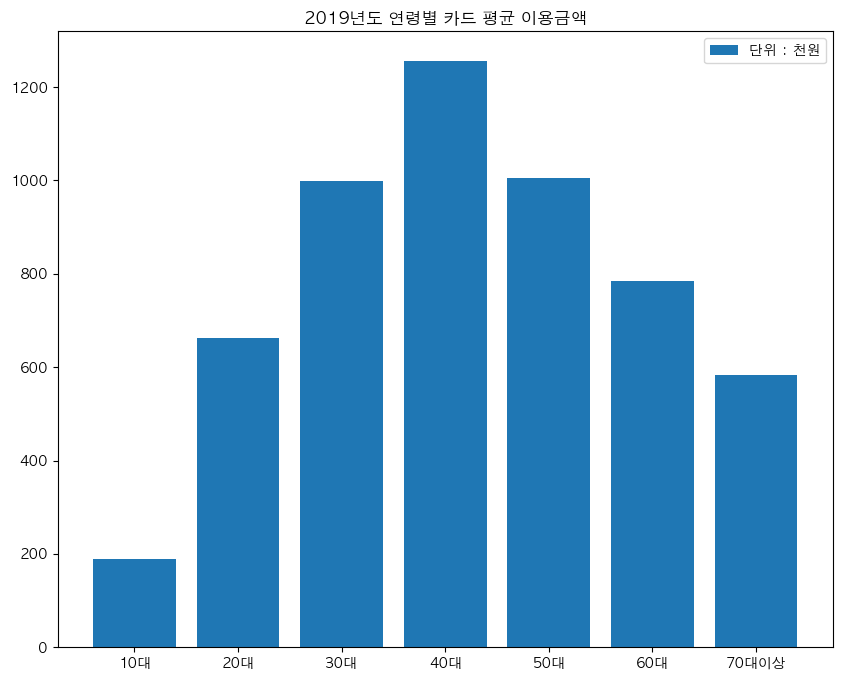

In [50]:
plt.figure(figsize = (10, 8))
plt.bar(age_2019_amt['연령대별(AGE)'], age_2019_amt['카드이용금액계(AMT_CORR)'], label = '단위 : 천원')
plt.title('2019년도 연령별 카드 평균 이용금액')
plt.legend()
plt.show()

### 2019년 남/여성 월평균 이용금액 및 이용횟수 추이 비교

In [51]:
month_2019_amt = pd.DataFrame(gender_age_2019.groupby('기준월(M)').mean()['카드이용금액계(AMT_CORR)']/1000).reset_index()
month_2019_amt

/var/folders/z_/klqlrq151nv7wlzdmp2krt8h0000gn/T/ipykernel_20072/2861121371.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_2019_amt = pd.DataFrame(gender_age_2019.groupby('기준월(M)').mean()['카드이용금액계(AMT_CORR)']/1000).reset_index()


,기준월(M),카드이용금액계(AMT_CORR)
0,1,1064.932232
1,2,1014.031914
2,3,904.657834
3,4,947.725540
4,5,864.821238
5,6,770.472532
6,7,792.977430
7,8,1052.081636
8,9,825.849652
9,10,899.351782


In [52]:
month_2019_cnt = pd.DataFrame(gender_age_2019.groupby('기준월(M)').mean()['카드이용건수계(USECT_CORR)']).reset_index()
month_2019_cnt

/var/folders/z_/klqlrq151nv7wlzdmp2krt8h0000gn/T/ipykernel_20072/3682486176.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_2019_cnt = pd.DataFrame(gender_age_2019.groupby('기준월(M)').mean()['카드이용건수계(USECT_CORR)']).reset_index()


,기준월(M),카드이용건수계(USECT_CORR)
0,1,27.908
1,2,31.090
2,3,30.692
3,4,34.468
4,5,29.998
5,6,29.792
6,7,31.782
7,8,28.000
8,9,34.458
9,10,39.802


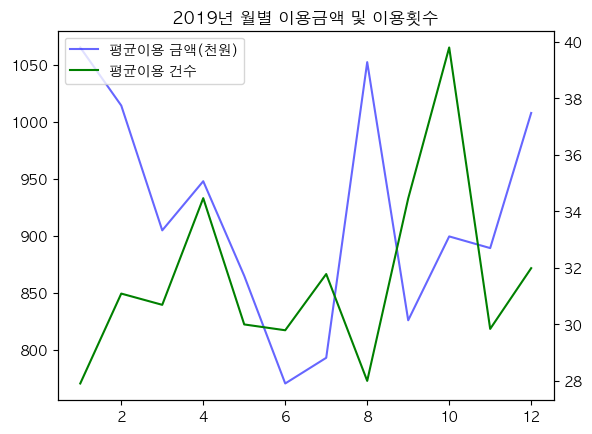

In [53]:
fig, ax1 = plt.subplots()
line1 = ax1.plot(month_2019_amt['기준월(M)'], month_2019_amt['카드이용금액계(AMT_CORR)'], 
                color = 'blue', label = '평균이용 금액(천원)', alpha = 0.6)

ax2 = ax1.twinx() # ax1과 x축을 공유하는 새로운 객체 생성
line2 = ax2.plot(month_2019_cnt['기준월(M)'], month_2019_cnt['카드이용건수계(USECT_CORR)'], 
                color = 'green', label = '평균이용 건수')

lines = line1 + line2 # 두 축의 범례를 하나의 텍스트 상자에 표시하기 위해 두 그래프를 합침
labels = [l.get_label() for l in lines] # get_label() 함수를 이용하여 label 리턴
plt.legend(lines, labels) # handles (선 모양과 색깔 등) 와 labels (범례 이름)

plt.title('2019년 월별 이용금액 및 이용횟수')
plt.show()

In [54]:
lines

### 2019년 남/여성 월별 평균이용금액 및 평균이용횟수, 1회 이용금액 추이 비교

In [55]:
# 2019년 남녀 분리
data_2019_f = gender_age_2019[gender_age_2019['성별(GENDER)'] == 'F']
data_2019_m = gender_age_2019[gender_age_2019['성별(GENDER)'] == 'M']

In [56]:
data_2019_f

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도(Y),기준월(M),건당카드평균이용금액(MEAN_CORR),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3),카드소비정도(RATE_CORR)
1,201901,SS064,F,30대,30,79632,2019,1,2654.4,자동차,자동차서비스/용품,자동차서비스,소
3,201901,SS064,F,40대,15,54936,2019,1,3662.4,자동차,자동차서비스/용품,자동차서비스,소
5,201901,SS064,F,20대,10,80640,2019,1,8064.0,자동차,자동차서비스/용품,자동차서비스,소
12,201902,SS064,F,40대,30,158445,2019,2,5281.5,자동차,자동차서비스/용품,자동차서비스,소
13,201903,SS064,F,20대,5,5050,2019,3,1010.0,자동차,자동차서비스/용품,자동차서비스,소
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11952,201911,SS011,F,30대,10,186850,2019,11,18685.0,요식/유흥,유흥,유흥주점,소
11964,201907,SS037,F,30대,5,50600,2019,7,10120.0,여행/교통,여행,여행사,소
11970,201908,SS050,F,40대,5,2281500,2019,8,456300.0,교육/학원,학원,독서실,대
11971,201910,SS050,F,40대,5,909000,2019,10,181800.0,교육/학원,학원,독서실,중


In [57]:
# F
# 월별 평균이용금액
data_2019_f_amt = pd.DataFrame(data_2019_f.groupby('기준월(M)').mean()['카드이용금액계(AMT_CORR)']/1000).reset_index()
# 월별 평균이용건수
data_2019_f_cnt = pd.DataFrame(data_2019_f.groupby('기준월(M)').mean()['카드이용건수계(USECT_CORR)']).reset_index()
# 월별 1회이용금액
data_2019_f_mean = pd.DataFrame(data_2019_f.groupby('기준월(M)').mean()['건당카드평균이용금액(MEAN_CORR)']).reset_index()

# M
# 월별 평균이용금액
data_2019_m_amt = pd.DataFrame(data_2019_m.groupby('기준월(M)').mean()['카드이용금액계(AMT_CORR)']/1000).reset_index()
# 월별 평균이용건수
data_2019_m_cnt = pd.DataFrame(data_2019_m.groupby('기준월(M)').mean()['카드이용건수계(USECT_CORR)']).reset_index()
# 월별 1회이용금액
data_2019_m_mean = pd.DataFrame(data_2019_m.groupby('기준월(M)').mean()['건당카드평균이용금액(MEAN_CORR)']).reset_index()

/var/folders/z_/klqlrq151nv7wlzdmp2krt8h0000gn/T/ipykernel_20072/3564605212.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_2019_f_amt = pd.DataFrame(data_2019_f.groupby('기준월(M)').mean()['카드이용금액계(AMT_CORR)']/1000).reset_index()
/var/folders/z_/klqlrq151nv7wlzdmp2krt8h0000gn/T/ipykernel_20072/3564605212.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_2019_f_cnt = pd.DataFrame(data_2019_f.groupby('기준월(M)').mean()['카드이용건수계(USECT_CORR)']).reset_index()
/var/folders/z_/klqlrq151nv7wlzdmp2krt8h0000gn/T/ipykernel_20072/3564605212.py:7: FutureWarning: The default value of numeric_only in DataFrame

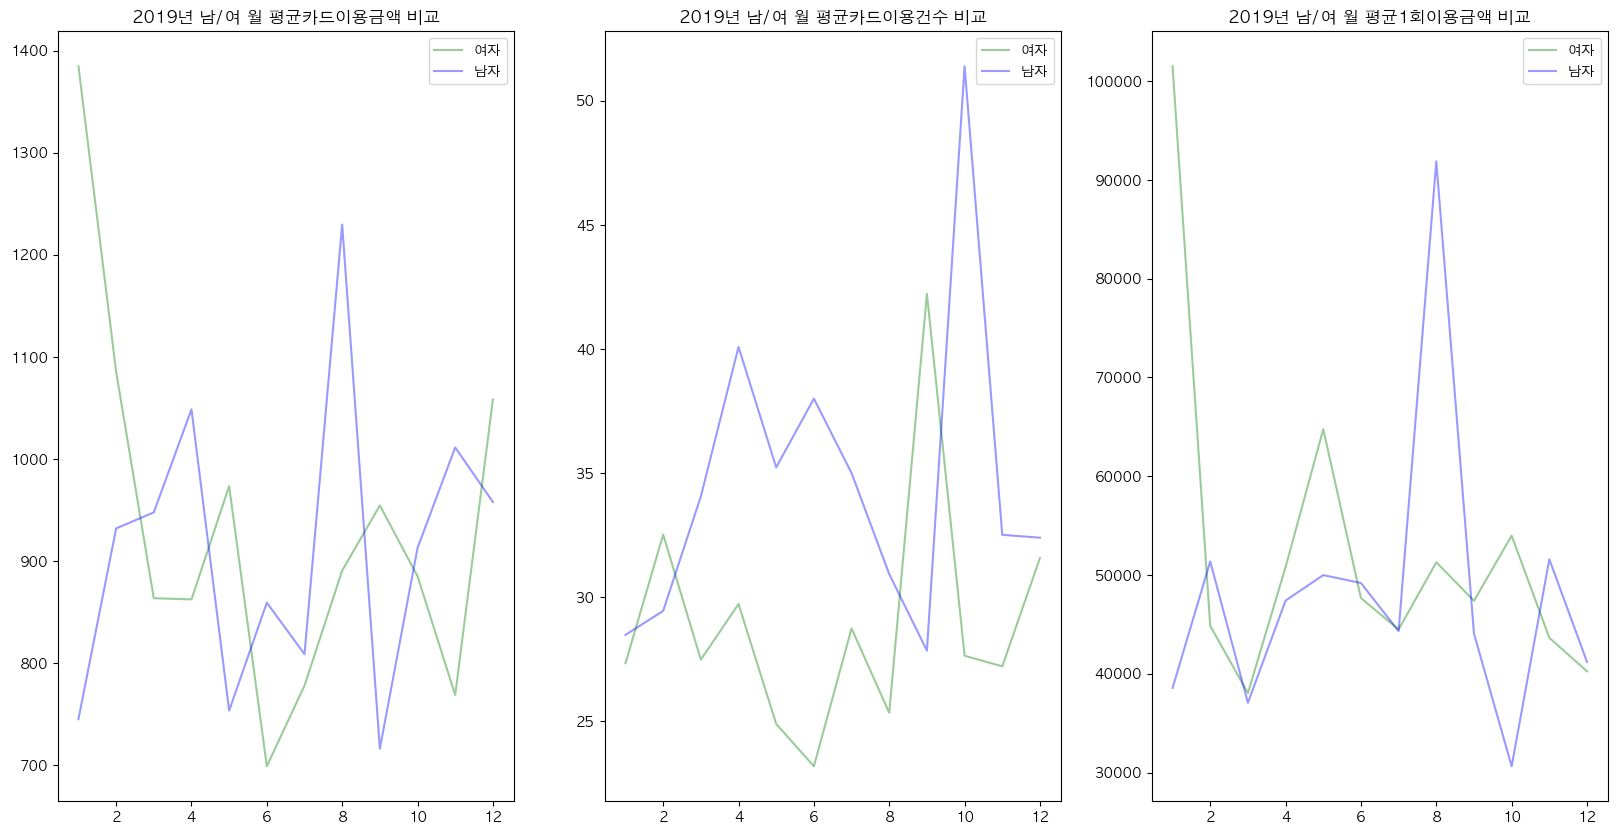

In [58]:
plt.figure(figsize= (20,10))
plt.subplot(131)
plt.plot(data_2019_f_amt['기준월(M)'], data_2019_f_amt['카드이용금액계(AMT_CORR)'], color = 'green', label = '여자', alpha = 0.4)
plt.plot(data_2019_m_amt['기준월(M)'], data_2019_m_amt['카드이용금액계(AMT_CORR)'], color = 'blue', label = '남자', alpha = 0.4)
plt.legend()
plt.title('2019년 남/여 월 평균카드이용금액 비교')

plt.subplot(132)
plt.plot(data_2019_f_cnt['기준월(M)'], data_2019_f_cnt['카드이용건수계(USECT_CORR)'], color = 'green', label = '여자', alpha = 0.4)
plt.plot(data_2019_m_cnt['기준월(M)'], data_2019_m_cnt['카드이용건수계(USECT_CORR)'], color = 'blue', label = '남자', alpha = 0.4)
plt.legend()
plt.title('2019년 남/여 월 평균카드이용건수 비교')

plt.subplot(133)
plt.plot(data_2019_f_mean['기준월(M)'], data_2019_f_mean['건당카드평균이용금액(MEAN_CORR)'], color = 'green', label = '여자', alpha = 0.4)
plt.plot(data_2019_m_mean['기준월(M)'], data_2019_m_mean['건당카드평균이용금액(MEAN_CORR)'], color = 'blue', label = '남자', alpha = 0.4)
plt.legend()
plt.title('2019년 남/여 월 평균1회이용금액 비교')

plt.show()

### 2019년도 시간대구간별 카드이용건수 비교

In [59]:
Time_Reg['기준년도(Y)'] = Time_Reg['기준일자(YMD)'].dt.year
Time_Reg_2019 = Time_Reg[Time_Reg['기준년도(Y)'] == 2019]
Time_Reg_2019

,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),기준년도(Y)
0,의료,2019-01-28,2,22680,10,2019
1,전자상거래,2019-01-05,6,356832,10,2019
2,유통,2019-01-01,3,1121350,30,2019
3,주유,2019-01-01,5,126292,5,2019
4,유통,2019-01-17,6,376236,35,2019
...,...,...,...,...,...,...
5995,주유,2019-12-17,4,648643,10,2019
5996,유통,2019-12-02,4,161916,26,2019
5997,여행교통,2019-12-20,4,268315,10,2019
5998,가정생활서비스,2019-12-21,2,154500,5,2019


In [60]:
time_2019_cnt = pd.DataFrame(Time_Reg_2019.groupby('시간대구간(TIME)').sum()['카드이용건수계(USECT_CORR)']).reset_index()
time_2019_cnt

/var/folders/z_/klqlrq151nv7wlzdmp2krt8h0000gn/T/ipykernel_20072/190119094.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_2019_cnt = pd.DataFrame(Time_Reg_2019.groupby('시간대구간(TIME)').sum()['카드이용건수계(USECT_CORR)']).reset_index()


,시간대구간(TIME),카드이용건수계(USECT_CORR)
0,1,4985
1,2,13527
2,3,21997
3,4,20245
4,5,31356
5,6,12492


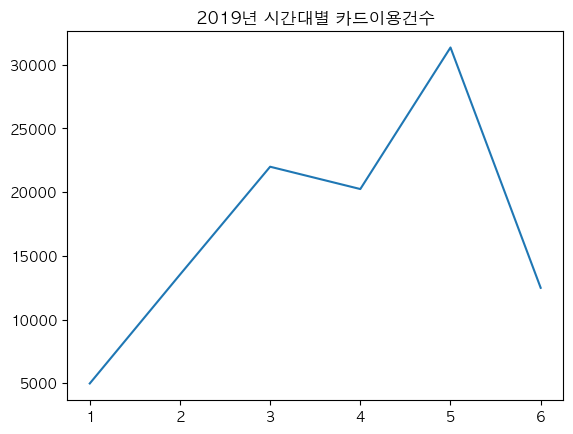

In [61]:
plt.plot(time_2019_cnt['시간대구간(TIME)'], time_2019_cnt['카드이용건수계(USECT_CORR)'] )
plt.title('2019년 시간대별 카드이용건수')
plt.show()

### 2019년 요일별 카드이용건수 비교

In [62]:
Time_Reg_2019

,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),기준년도(Y)
0,의료,2019-01-28,2,22680,10,2019
1,전자상거래,2019-01-05,6,356832,10,2019
2,유통,2019-01-01,3,1121350,30,2019
3,주유,2019-01-01,5,126292,5,2019
4,유통,2019-01-17,6,376236,35,2019
...,...,...,...,...,...,...
5995,주유,2019-12-17,4,648643,10,2019
5996,유통,2019-12-02,4,161916,26,2019
5997,여행교통,2019-12-20,4,268315,10,2019
5998,가정생활서비스,2019-12-21,2,154500,5,2019


In [63]:
# 날짜의 요일 산출
Time_Reg_2019['요일'] = Time_Reg_2019['기준일자(YMD)'].dt.weekday + 1
Time_Reg_2019
# 1,2,3,4,5,6,7 로 되어있던 요일을 월, 화, 수, 목, 금, 토, 일요일의 형태로 변환
Time_Reg_2019['요일'] = Time_Reg_2019['요일'].replace([1,2,3,4,5,6,7], ['월요일','화요일','수요일','목요일','금요일','토요일','일요일'])
Time_Reg_2019.head()

/var/folders/z_/klqlrq151nv7wlzdmp2krt8h0000gn/T/ipykernel_20072/38361567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Time_Reg_2019['요일'] = Time_Reg_2019['기준일자(YMD)'].dt.weekday + 1
/var/folders/z_/klqlrq151nv7wlzdmp2krt8h0000gn/T/ipykernel_20072/38361567.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Time_Reg_2019['요일'] = Time_Reg_2019['요일'].replace([1,2,3,4,5,6,7], ['월요일','화요일','수요일','목요일','금요일','토요일','일요일'])


,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),기준년도(Y),요일
0,의료,2019-01-28,2,22680,10,2019,월요일
1,전자상거래,2019-01-05,6,356832,10,2019,토요일
2,유통,2019-01-01,3,1121350,30,2019,화요일
3,주유,2019-01-01,5,126292,5,2019,화요일
4,유통,2019-01-17,6,376236,35,2019,목요일


In [64]:
week_2019_cnt = pd.DataFrame(Time_Reg_2019.groupby('요일').sum()['카드이용건수계(USECT_CORR)']).reset_index()
week_2019_cnt

/var/folders/z_/klqlrq151nv7wlzdmp2krt8h0000gn/T/ipykernel_20072/4053771263.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  week_2019_cnt = pd.DataFrame(Time_Reg_2019.groupby('요일').sum()['카드이용건수계(USECT_CORR)']).reset_index()


,요일,카드이용건수계(USECT_CORR)
0,금요일,15741
1,목요일,14774
2,수요일,16772
3,월요일,15717
4,일요일,12446
5,토요일,14287
6,화요일,14865


In [65]:
week_2019_cnt['tmp'] = pd.DataFrame([5,4,3,1,7,6,2])
week_2019_cnt = week_2019_cnt.sort_values(by = 'tmp')
week_2019_cnt.drop('tmp', axis = 1, inplace = True)
week_2019_cnt

,요일,카드이용건수계(USECT_CORR)
3,월요일,15717
6,화요일,14865
2,수요일,16772
1,목요일,14774
0,금요일,15741
5,토요일,14287
4,일요일,12446


Text(0.5, 1.0, '2019년 요일별 카드이용건수 합계')

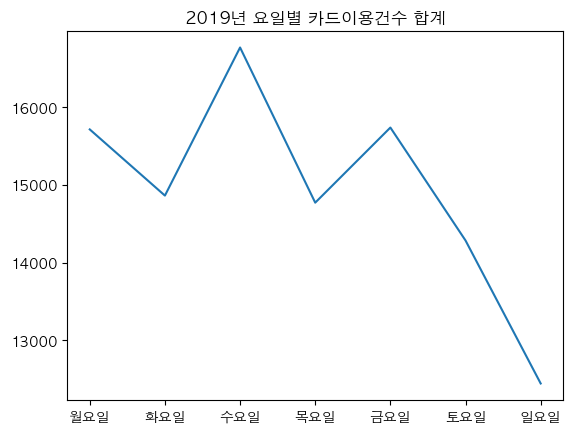

In [66]:
plt.plot(week_2019_cnt['요일'], week_2019_cnt['카드이용건수계(USECT_CORR)'])
plt.title('2019년 요일별 카드이용건수 합계')

### 남/여 업종 대분류별 카드평균이용금액 비교

In [67]:
gender_age_2019

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도(Y),기준월(M),건당카드평균이용금액(MEAN_CORR),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3),카드소비정도(RATE_CORR)
0,201901,SS064,M,50대,5,1058400,2019,1,211680.0,자동차,자동차서비스/용품,자동차서비스,대
1,201901,SS064,F,30대,30,79632,2019,1,2654.4,자동차,자동차서비스/용품,자동차서비스,소
2,201901,SS064,M,40대,15,2561913,2019,1,170794.2,자동차,자동차서비스/용품,자동차서비스,대
3,201901,SS064,F,40대,15,54936,2019,1,3662.4,자동차,자동차서비스/용품,자동차서비스,소
4,201901,SS064,M,40대,10,66528,2019,1,6652.8,자동차,자동차서비스/용품,자동차서비스,소
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11970,201908,SS050,F,40대,5,2281500,2019,8,456300.0,교육/학원,학원,독서실,대
11971,201910,SS050,F,40대,5,909000,2019,10,181800.0,교육/학원,학원,독서실,중
11972,201911,SS050,M,50대,10,3490560,2019,11,349056.0,교육/학원,학원,독서실,대
11973,201911,SS050,F,50대,5,151500,2019,11,30300.0,교육/학원,학원,독서실,소


In [68]:
gender_2019_f = gender_age_2019[gender_age_2019['성별(GENDER)'] == 'F']
gender_2019_m = gender_age_2019[gender_age_2019['성별(GENDER)'] == 'M']

In [69]:
gender_2019_m.head()

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도(Y),기준월(M),건당카드평균이용금액(MEAN_CORR),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3),카드소비정도(RATE_CORR)
0,201901,SS064,M,50대,5,1058400,2019,1,211680.0,자동차,자동차서비스/용품,자동차서비스,대
2,201901,SS064,M,40대,15,2561913,2019,1,170794.2,자동차,자동차서비스/용품,자동차서비스,대
4,201901,SS064,M,40대,10,66528,2019,1,6652.8,자동차,자동차서비스/용품,자동차서비스,소
6,201902,SS064,M,40대,25,832465,2019,2,33298.6,자동차,자동차서비스/용품,자동차서비스,중
7,201902,SS064,M,50대,5,7545,2019,2,1509.0,자동차,자동차서비스/용품,자동차서비스,소


In [70]:
# 여자의 대분류 별 카드이용금액 평균 (단위 : 천원)
class1_f_amt = pd.DataFrame(gender_2019_f.groupby('대분류(CLASS1)').mean()['카드이용금액계(AMT_CORR)']/1000).reset_index()

# 남자의 대분류 별 카드이용금액 평균 (단위 : 천원)
class1_m_amt = pd.DataFrame(gender_2019_m.groupby('대분류(CLASS1)').mean()['카드이용금액계(AMT_CORR)']/1000).reset_index()

class1_m_amt


/var/folders/z_/klqlrq151nv7wlzdmp2krt8h0000gn/T/ipykernel_20072/1472521017.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class1_f_amt = pd.DataFrame(gender_2019_f.groupby('대분류(CLASS1)').mean()['카드이용금액계(AMT_CORR)']/1000).reset_index()
/var/folders/z_/klqlrq151nv7wlzdmp2krt8h0000gn/T/ipykernel_20072/1472521017.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class1_m_amt = pd.DataFrame(gender_2019_m.groupby('대분류(CLASS1)').mean()['카드이용금액계(AMT_CORR)']/1000).reset_index()


,대분류(CLASS1),카드이용금액계(AMT_CORR)
0,가전/가구,1352.360630
1,가정생활/서비스,918.041081
2,교육/학원,865.218167
3,미용,337.115711
4,스포츠/문화/레저,548.631437
5,여행/교통,1010.984832
6,요식/유흥,849.568999
7,유통,1221.113709
8,음/식료품,472.475892
9,의료,621.857873


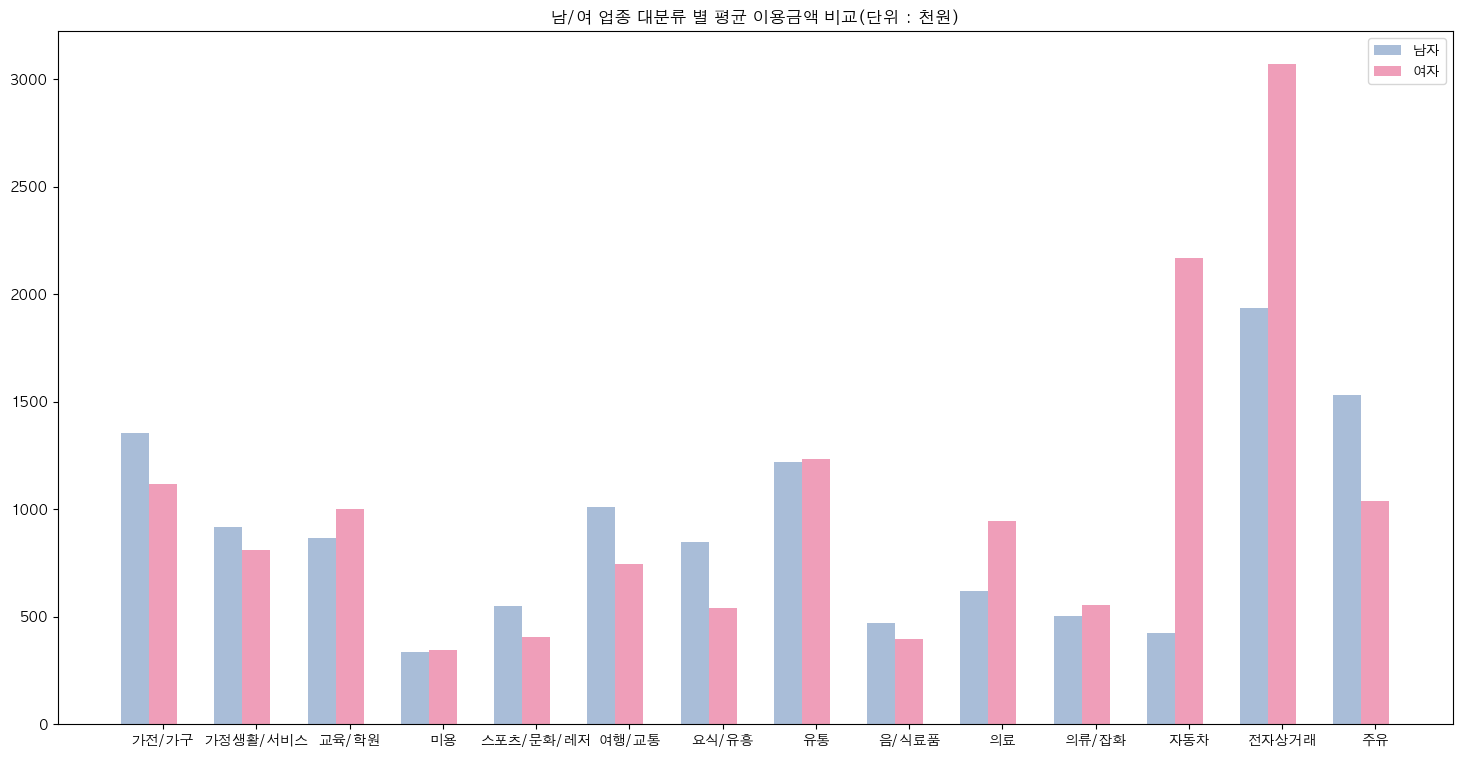

In [71]:
plt.figure(figsize=(18, 9))
bar_width = 0.3 # 그래프 너비 지정
index = np.arange(14) # 대분류 종류가 총 14개 이므로 인덱스 14개 생성

# bar1은 index를 bar2는 index에 bar_width를 더해줌으로써 겹치지 않고 다중 그래프 생성
bar1 = plt.bar(index, class1_m_amt['카드이용금액계(AMT_CORR)'], 
               bar_width, color = '#A9BDD8', label = '남자')

bar2 = plt.bar(index+bar_width, class1_f_amt['카드이용금액계(AMT_CORR)'], 
               bar_width, color = '#EF9EB9', label = '여자')

plt.xticks(np.arange(bar_width, 14+bar_width, 1), class1_m_amt['대분류(CLASS1)'])
plt.legend()
plt.title('남/여 업종 대분류 별 평균 이용금액 비교(단위 : 천원)')
plt.show()

### 남/여 업종 대분류별 카드 평균이용건수 비교

In [72]:
# 여자의 대분류 별 카드이용건수 평균
class1_f_cnt = pd.DataFrame(gender_2019_f.groupby('대분류(CLASS1)').mean()['카드이용건수계(USECT_CORR)']).reset_index()

# 남자의 대분류 별 카드이용건수 평균
class1_m_cnt = pd.DataFrame(gender_2019_m.groupby('대분류(CLASS1)').mean()['카드이용건수계(USECT_CORR)']).reset_index()



/var/folders/z_/klqlrq151nv7wlzdmp2krt8h0000gn/T/ipykernel_20072/2078814366.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class1_f_cnt = pd.DataFrame(gender_2019_f.groupby('대분류(CLASS1)').mean()['카드이용건수계(USECT_CORR)']).reset_index()
/var/folders/z_/klqlrq151nv7wlzdmp2krt8h0000gn/T/ipykernel_20072/2078814366.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class1_m_cnt = pd.DataFrame(gender_2019_m.groupby('대분류(CLASS1)').mean()['카드이용건수계(USECT_CORR)']).reset_index()


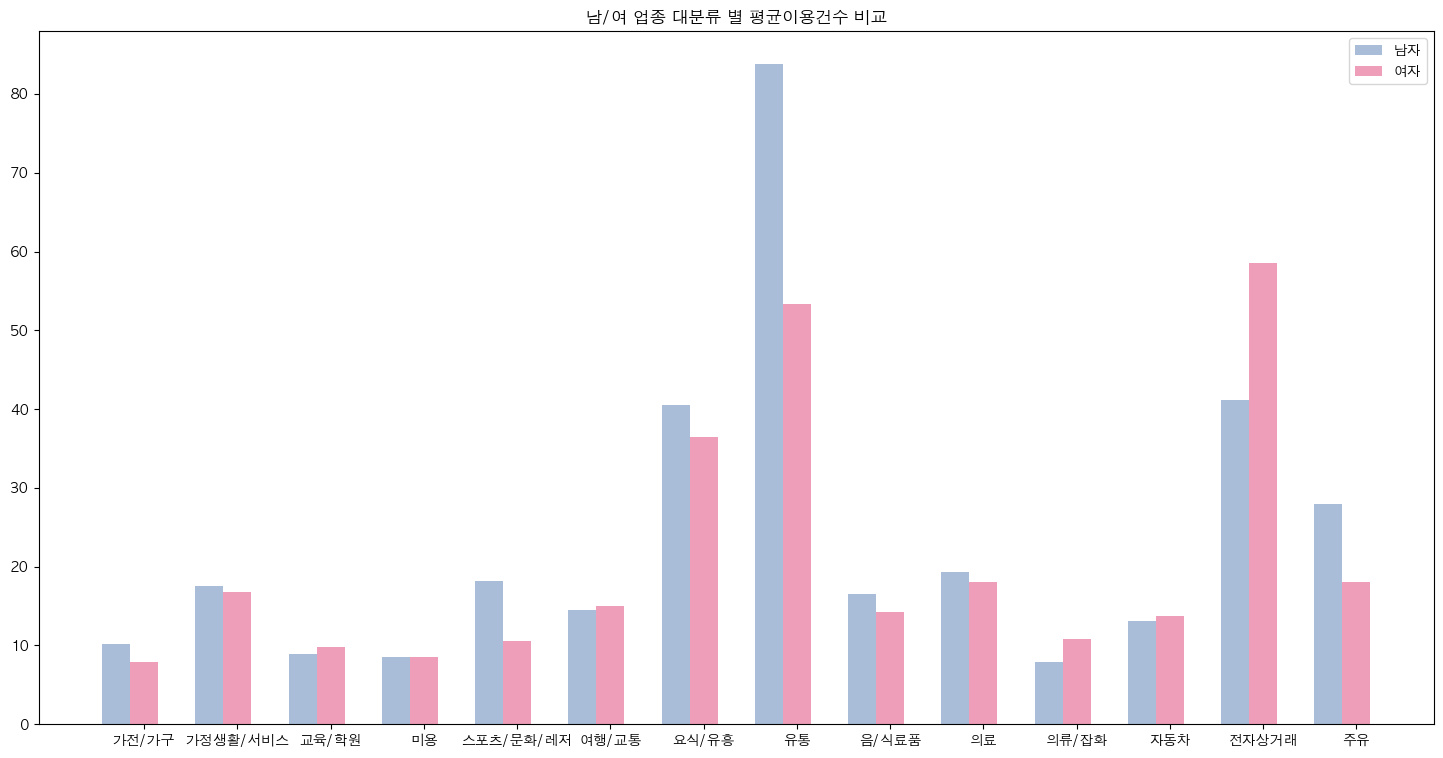

In [73]:
plt.figure(figsize=(18, 9))
bar_width = 0.3 # 그래프 너비 지정
index = np.arange(14) # 대분류 종류가 총 14개 이므로 인덱스 14개 생성

# bar1은 index를 bar2는 index에 bar_width를 더해줌으로써 겹치지 않고 다중 그래프 생성
bar1 = plt.bar(index, class1_m_cnt['카드이용건수계(USECT_CORR)'], 
               bar_width, color = '#A9BDD8', label = '남자')

bar2 = plt.bar(index+bar_width, class1_f_cnt['카드이용건수계(USECT_CORR)'], 
               bar_width, color = '#EF9EB9', label = '여자')

plt.xticks(np.arange(bar_width, 14+bar_width, 1), class1_m_cnt['대분류(CLASS1)'])
plt.legend()
plt.title('남/여 업종 대분류 별 평균이용건수 비교')
plt.show()

## 3. 통계적 검정

##### 성별과 서울시민업종코드는 연관이있는가?

In [74]:
gender_age_2019.columns

Index(['기준년월(YM)', '서울시민업종코드(UPJONG_CD)', '성별(GENDER)', '연령대별(AGE)',
       '카드이용건수계(USECT_CORR)', '카드이용금액계(AMT_CORR)', '기준년도(Y)', '기준월(M)',
       '건당카드평균이용금액(MEAN_CORR)', '대분류(CLASS1)', '중분류(CLASS2)', '소분류(CLASS3)',
       '카드소비정도(RATE_CORR)'],
      dtype='object')

In [75]:
data_cross = pd.crosstab(gender_age_2019['연령대별(AGE)'], gender_age_2019['서울시민업종코드(UPJONG_CD)'])
data_cross

서울시민업종코드(UPJONG_CD),SS001,SS002,SS003,SS004,SS005,SS006,SS007,SS008,SS009,SS010,...,SS067,SS068,SS069,SS070,SS081,SS082,SS083,SS090,SS091,SS092
연령대별(AGE),,,,,,,,,,,,,,,,,,,,,
10대,12,8,6,1,4,7,8,15,4,0,...,0,4,9,0,0,0,0,0,0,0
20대,43,26,33,24,44,40,28,50,13,3,...,5,41,43,0,0,5,0,0,0,1
30대,44,21,42,35,43,41,45,49,14,3,...,2,51,61,0,0,2,2,0,2,4
40대,59,19,17,32,28,31,32,57,2,2,...,6,42,39,10,4,9,6,5,4,3
50대,53,19,11,28,43,26,27,42,5,3,...,7,19,17,14,0,8,8,6,0,1
60대,29,6,3,9,15,11,7,28,2,2,...,7,14,11,6,0,3,2,1,0,0
70대이상,23,4,2,3,6,2,3,11,0,0,...,3,3,4,2,1,1,2,0,0,0


In [76]:
result = stats.chi2_contingency(observed= data_cross)
print(f'''chi-square 값 : {result[0]}
p-value : {result[1]}
자유도 : {result[2]}''')


chi-square 값 : 925.6323285302731
p-value : 4.652386437158499e-38
자유도 : 432


##### 남녀간 건당카드이용금액에 차이가 있는가?

In [77]:
x = gender_2019_f['건당카드평균이용금액(MEAN_CORR)']
y = gender_2019_m['건당카드평균이용금액(MEAN_CORR)']

t_stat, p_val = stats.ttest_ind(x,y)
print(f't-statictic : {t_stat}, p-value : {p_val}')


t-statictic : 0.7687408632865479, p-value : 0.442077428615822


##### 카드이용건수와 카드이용금액계는 상관관계가 있는가?

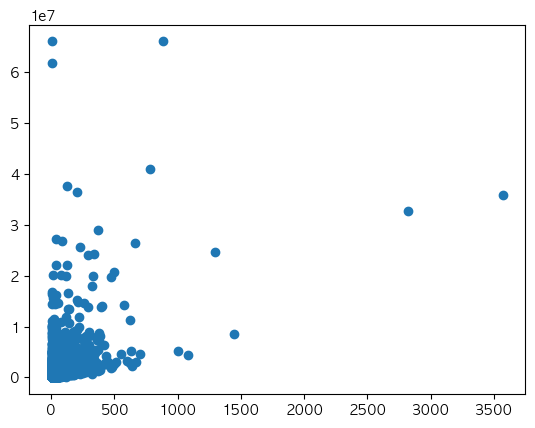

상관 계수 : 0.4863857292516376, p-value : 0.0


In [78]:
x = gender_age_2019['카드이용건수계(USECT_CORR)']
y = gender_age_2019['카드이용금액계(AMT_CORR)']

plt.scatter(x,y)
plt.show()
c_stat, p_val = stats.pearsonr(x,y)
print(f'상관 계수 : {c_stat}, p-value : {p_val}')

##### 카드이용건수와 카드이용금액계는 인과관계가 있는가?

In [79]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = x.values.reshape(-1,1)
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[14551.57175395]
458881.1542012086


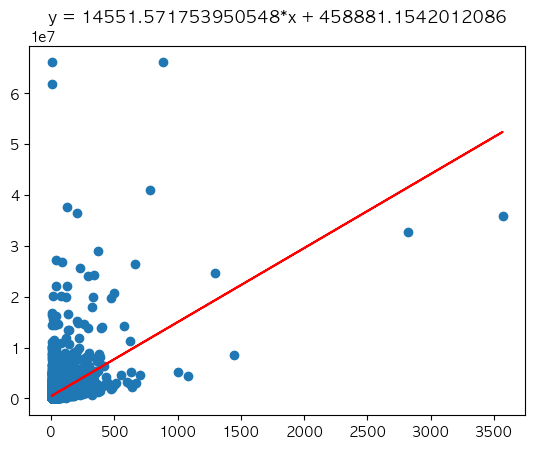

In [80]:
y2 = lr.coef_[0]*x +lr.intercept_
plt.scatter(x, y)
plt.plot(x, y2, color='red')
plt.title('y = {}*x + {}'.format(lr.coef_[0], lr.intercept_))
plt.show()

In [81]:
# 회귀분석 검정
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(x)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      카드이용금액계(AMT_CORR)   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     1859.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        13:13:38   Log-Likelihood:                -96381.
No. Observations:                6000   AIC:                         1.928e+05
Df Residuals:                    5998   BIC:                         1.928e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.589e+05   3.15e+04     14.589      0.000    3.97e+05    5.21e+05
카드이용건수계(USECT_CORR)  1.455e+04    337.528     43.112      0.000    1.39e+04    1.52e+04
==============================================================================
Omnibus:                    10836.360   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20091627.040
Skew:                          12.992   Prob(JB):                         0.00
Kurtosis:                     285.296   Cond. No.                         99.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""